In [ ]:
题目一、以鸢尾花数据集为例学习 SVM
1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

2.创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）

3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果


题目二、以新闻数据分类为例 学习朴素贝叶斯
1.导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
2.查看类别标签、数据集的描述、数据样本
3.将文本数据转换为词袋模型
4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42
5.创建并训练朴素贝叶斯分类器
6.使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
7.横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

题目三、以鸢尾花数据集为例 学习k-means聚类
1.导入数据集和聚类库
2.使用k-means聚类，将数据分为3个簇，设置随机种子为0
3.PCA 降维到2维空间后，输出可视化结果
4.尝试先降维，再聚类，再输出可视化结果，比较两次的不同
5.使用轮廓系数比较聚类效果
6.绘制轮廓系数与聚类数的关系图

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


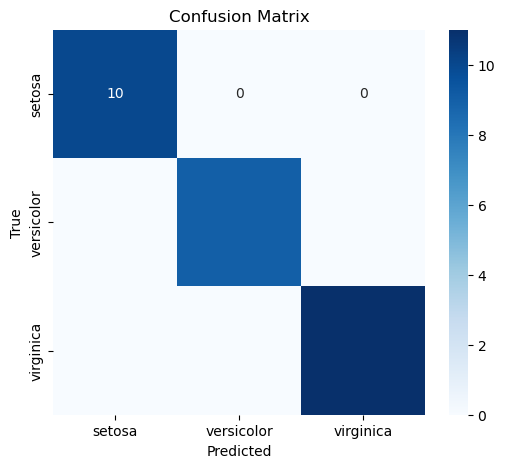

In [3]:
#题目一
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 1加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2创建并训练 SVM 模型，使用线性核函数，随机种子42
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# 3使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')  # 使用加权平均
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')  # 使用加权平均
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


类别标签： ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述： .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

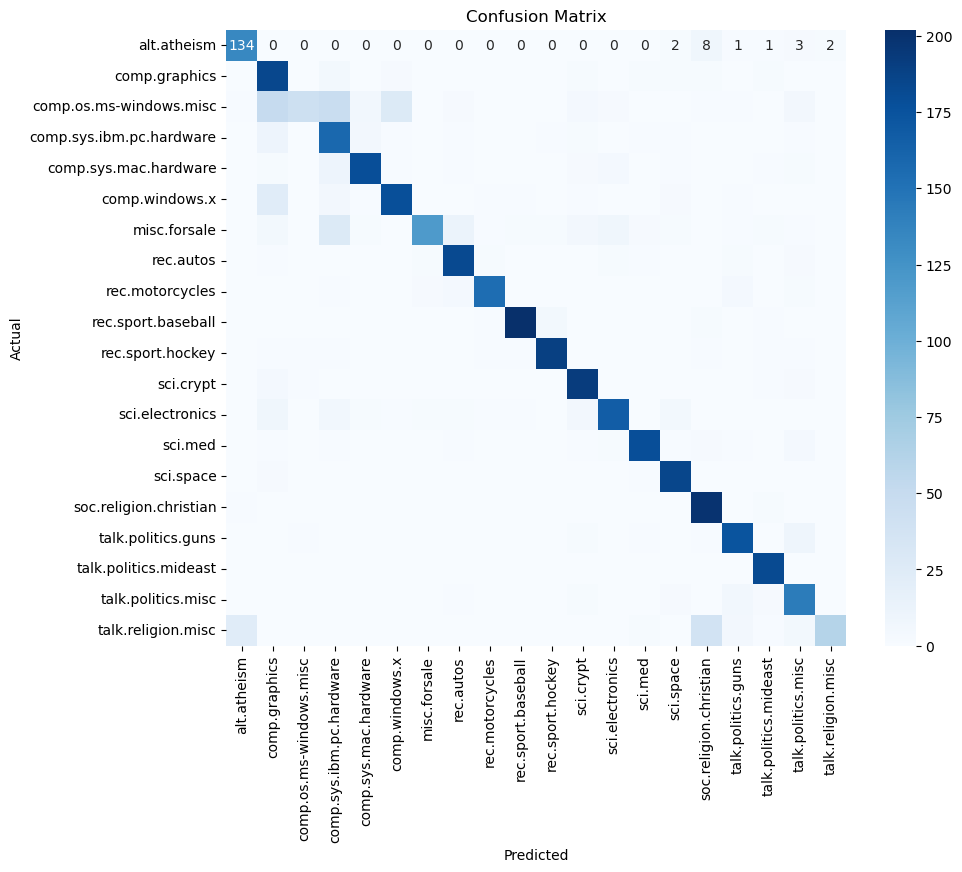

In [6]:
#第二题
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1加载20个新闻组数据集
newsgroups = fetch_20newsgroups(subset='all')

# 2查看类别标签和数据集描述，数据样本
print("类别标签：", newsgroups.target_names)
print("数据集描述：", newsgroups.DESCR)

print("样本数：", len(newsgroups.data))
print("第一个新闻样本：", newsgroups.data[0][:500])  # 显示第一个样本的前500个字符

# 3将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

print(f"词频矩阵的形状: {X.shape}")

#4将数据集分为训练集和测试集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}")

# 5创建朴素贝叶斯分类器
nb_model = MultinomialNB()

# 训练模型
nb_model.fit(X_train, y_train)

# 对测试集进行预测
y_pred = nb_model.predict(X_test)

# 6使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')  # 使用加权平均
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')  # 使用加权平均
print(f"F1 Score: {f1:.4f}")

# 7横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


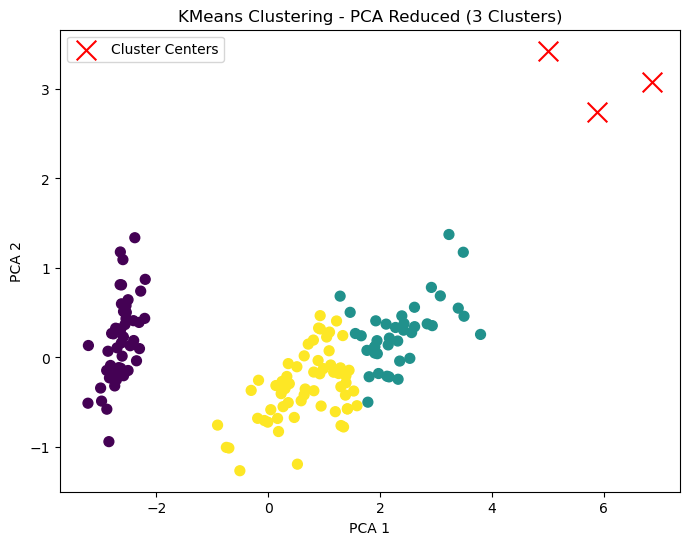

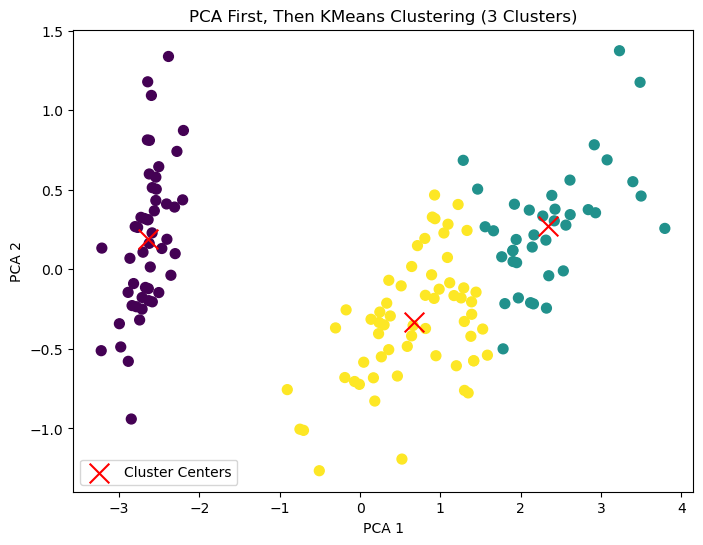

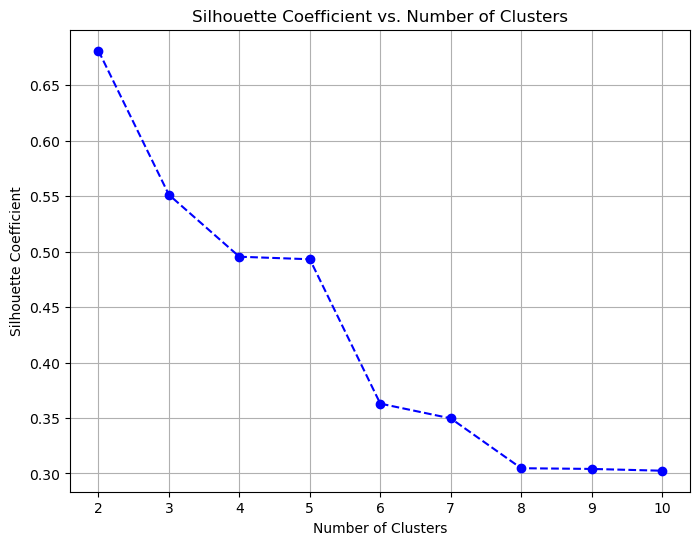

最佳聚类数: 2, 轮廓系数: 0.6810


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
os.environ['OMP_NUM_THREADS'] = '1'


#1导入数据集和聚类库
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

#2使用k-means聚类，将数据分为3个簇，设置随机种子为0
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

# 3 CA 降维到2维空间后，输出可视化结果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Cluster Centers")
plt.title("KMeans Clustering - PCA Reduced (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

#4尝试先降维，再聚类，再输出可视化结果，比较两次的不同
X_pca_reduced = PCA(n_components=2).fit_transform(X)

kmeans_reduced = KMeans(n_clusters=3, random_state=0,n_init='auto')
labels_reduced = kmeans_reduced.fit_predict(X_pca_reduced)

centroids_reduced = kmeans_reduced.cluster_centers_

# 可视化降维后聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=labels_reduced, cmap='viridis', s=50)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', marker='x', s=200, label="Cluster Centers")
plt.title("PCA First, Then KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# 5使用轮廓系数比较聚类效果
silhouette_scores = []
cluster_range = range(2, 11)  # 聚类数从2到10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init='auto')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 6绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='b', linestyle='--')
plt.title("Silhouette Coefficient vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# 输出最佳聚类数及其轮廓系数
best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"最佳聚类数: {best_n_clusters}, 轮廓系数: {best_score:.4f}")